# **Useful Things**
----
----
This page is meant to be a resource for extraneous information that doesn't merit a full notebook, but should still be noted.  

Usually a new section is denoted by one horizontal line (in my wiki pages).  One this page, different categories will be separated by two lines.  One horizontal line will be used to separate subsections within an overall topic.

----
----
## **Bash / Shell Scripting**
This section is dedicated to useful bash shell tricks and commands. 

----
### Make Files Using Bash Shell
You can make an empty file "foo.py" with the command: `touch foo.py`
<br>
To make a file with contents, you can use echo.  This will create the file listed on the right and add the specified line to this file:
```
echo "Text to go in file" > foo.txt
```
Using echo means you have to add each line manually.  This is tedious, so we would rather use the following method:
```
cat > /tmp/foo.txt <<EOF
 rd 1 /tmp/cover.fits silent
tv 1 cf=jt 0.1 8 jpeg=/tmp/cover.$filt.jpg
q
EOF
```
The three middle lines are written to the file "/tmp/foo.txt"

The issue with the last method is that variables are substituted into the file.  ie if `$foo` is a variable that hasnt been set, then the file `foo.sh` will be empty, if you use this: 
```
cat <<EOF > foo.sh
$foo
EOF
unset foo
```
You either need to set variable names or use an escape character:
- Escape character method
```
cat <<EOF > foo.sh
\$foo
EOF
```
- Setting variables
```
foo='$foo'
cat <<EOF > foo.sh
$foo
EOF
unset foo
```

----
### Commenting
When shell scripting, one line comments start with a single ```#```.  There are various ways to block comment.
```
#!/bin/bash

###
# Method 1
###
echo "*** Before comment block 1***"
:`
echo "Anything between these markers will not executed, but"
echo "this block comment method sucks."
echo "It is rife with issues"
`
echo "*** After comments block 1***"

###
# Method 2
###
echo "*** Before comment block 2***"
if [ 1 -eq 0 ]; then
for i in {1..5}
do
   echo "Welcome $i times"
done
fi
echo "*** After comments block 2***"

###
# Method 3
###
echo "*** Before comment block 3***"
<<COMMENT1
Anything typed here will not be executed.  
It will also change color, to signify it has 
been commented out. To end this block comment 
use the line below
COMMENT1
echo "*** After comments block 3***"

###
# Method 4
###
echo "*** Before comment block 4***"
: <<'EOF'
CODE block starts
CODE block ends here
EOF
echo "*** After comments block 4***"
```
The most clever way is "Method 2."  A conditional that fails will not execute anything inside it, so it acts as a block comment.  The only downside to this method is that the code will not change to a commented out color.  So, at a quick glance, it will still look like executable code.


----
### Running Scripts
Before you can execute a script from the command line, it need the proper permissions.
```
# change permissions of 'file2change.sh'
chmod a+x file2change.sh

# run 'file2change.sh'
./file2change.sh
```


----
### Loops
There are tons of ways to write loops.  Heres a couple:
```
#!/bin/bash
for i in {1..5}; do
   echo "Welcome $i times"
done

for i in 1 2 3 4 5
do
   echo "$i  more times"
done

```
Only loop over ODD numbers (this is for older versions of bash):
```
for i in $(seq -w 01 02 40); do
   echo $i
done
```

----
## Tools

### Grep
Docker runs at startup, even when told not to.  To check if docker is running on this machine: list everything `launchctl` and search that list with `grep`
```
launchctl list | grep -i Docker
```
`-i` isnt needed in this specific example, but it removes case sensitivity in grep, so its useful in general.


----
----
## Docker
To screen into a docker container:
```
screen ~/Library/Containers/com.docker.docker/Data/vms/0/tty
```


----
----
## **Notebook Features**

### Entering HTML

If you designate blocks of code as HTML:

In [0]:
%%html
<marquee style='width: 30%; color: blue;'><b>Whee!</b></marquee>

In [0]:
%%html
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 450 400" width="200" height="200">
  <rect x="80" y="60" width="250" height="250" rx="20" style="fill:red; stroke:black; fill-opacity:0.7" />
  <rect x="180" y="110" width="250" height="250" rx="40" style="fill:blue; stroke:black; fill-opacity:0.5;" />
</svg>

### Images
This is how you can add images to your google colab notebooks.  Online tutorials tell you to:
1. add images to google drive
2. make a shared link to the image 
3. click the image tab on google colab to get `![alt text](https://)` and paste the link in place of the URL
```
![alt text](https://drive.google.com/open?id=12nOrBHzKHP5RQ-W19tVseBXxiSvOHMam)
```
4. then change "open" to "uc"
```
![alt text](https://drive.google.com/uc?id=12nOrBHzKHP5RQ-W19tVseBXxiSvOHMam)
```

The easiest way to add images to google colab notebook is by adding them to github or using an HTML code block.  


### Github Images
This is how you use the URL of an image you added to github.  Doing this allows you to control image size better than the HTML method of adding images.
![](https://github.com//cmutnik/wiki_pages/blob/master/bah/git_error1.jpg?raw=true)
Either line, in the code block below, will show the image displayed above.
1. To get the URL in the first line below, just pull the image up in github and inspect the html of the image you want to use.  Doing this will give you a relative link, with the text `?raw=true` at the end.  Turn this relative text into a github URL and past it into a notebook (with `?raw=true` at the end).
2. The second line below uses a github URL for raw images.

```
# from github html inspection
![](https://github.com//cmutnik/wiki_pages/blob/master/bah/git_error1.jpg?raw=true)

# github raw url
![](https://raw.githubusercontent.com/cmutnik/wiki_pages/master/bah/git_error1.jpg)
```


### HTML Images
A more advanced example of this shown by the colored boxes, above.  The simplified version is shown below.  Follow these steps
1. use a code block in google colab
2. specify you want html used, by typing `%%html`
3. add an iframe to html using

In [0]:
%%html
<iframe src="https://drive.google.com/uc?id=12nOrBHzKHP5RQ-W19tVseBXxiSvOHMam" width="640" height="480"></iframe>

<!--
%%html
-->
<iframe src="https://drive.google.com/file/d/12nOrBHzKHP5RQ-W19tVseBXxiSvOHMam/preview" width="640" height="480"></iframe>

### Interactive Plotting in google.colab

[Plotly cheatsheet](https://github.com/juanklopper/Plotly-for-python/blob/master/python_cheat_sheet.pdf)


There are a lot of interacive plotting examples online, like [this one](https://colab.research.google.com/drive/1zufbtdWp_6R2ZQMqmOeCcT6toi6OBMyv#scrollTo=de-egeLbKf9H) that was provided [here](https://jeremybejarano.com/interactive-widget-demo.html)

[Here](https://www.youtube.com/watch?v=F2pAu9PzgEE) is an explanation of how to integrate plotly into your google colab notebooks.  The code is on github, [here.](https://github.com/juanklopper/Plotly-for-python)

Below, I have pulled interactive plot example from Kaimis 1st Example:



In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#@title
SLOPE_TRUE = np.random.uniform(-4, 4)
INTERCEPT_TRUE = np.random.uniform(-4, 4)

In [0]:
x = np.arange(0, 10, 1)# measurements
y_true = SLOPE_TRUE * x + INTERCEPT_TRUE# true mapping
y_err = np.random.uniform(0.5, 1.0, size=x.size)# create noise
y = np.random.normal(y_true, y_err)# add noise to data

In [0]:
def plot_guess(SLOPE=1, INTERCEPT=1):
    """
    Input your choice of slope and intercept, and observe how the line shifts
    """
    fig = plt.figure(figsize=(16,9))
    ax = plt.gca()
    ax.plot(x, y, 'k.', ms=20, label="Measurements")
    ax.plot(x, y_true, 'b', label="True Mapping")
    y_guess = SLOPE * x + INTERCEPT
    ax.plot(x, y_guess, 'r', 
            label=f"Your Guess: $y=({SLOPE}) \cdot x + ({INTERCEPT})$")
    plt.legend()
    plt.show()

In [0]:
#@title Use the sliders to select your parameters
YOUR_SLOPE = -5 #@param {type:"slider", min:-10, max:10, step:0.1}
YOUR_INTERCEPT = 3.5 #@param {type:"slider", min:-10, max:10, step:0.1}

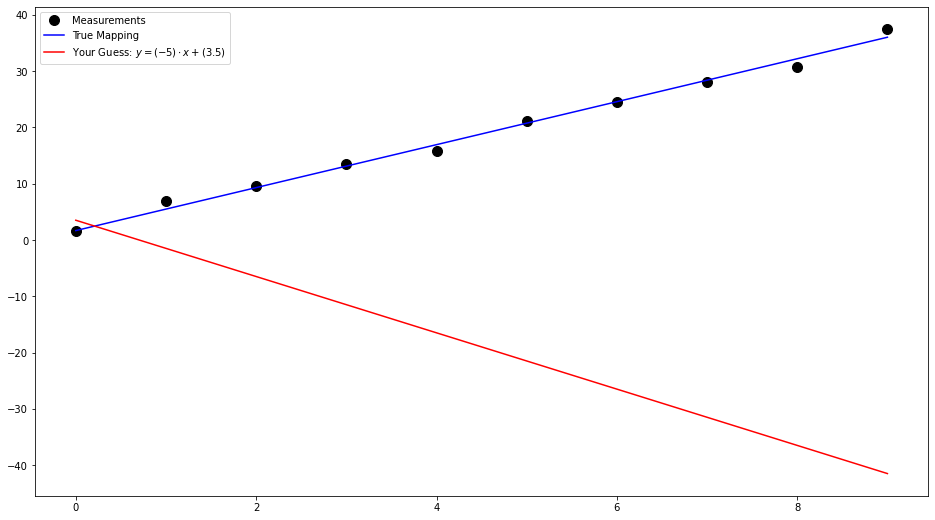

In [0]:
plot_guess(SLOPE=YOUR_SLOPE, INTERCEPT=YOUR_INTERCEPT)

# Changing your plots xticks

([<matplotlib.axis.YTick at 0x7f8ab2a4fa90>,
 [Text(0, 0, '7'), Text(0, 0, '8'), Text(0, 0, '9')])

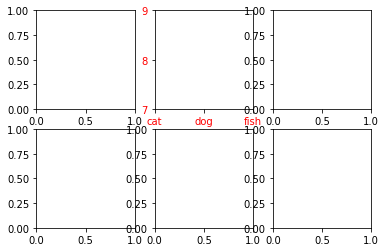

In [0]:
import matplotlib.pyplot as plt

# create subplots
fig, axes = plt.subplots(2, 3)

# get subplot at (0, 1)
plt.sca(axes[0, 1])

# modify tick labels
plt.xticks([0, 1, 2], ["cat", "dog", "fish"], color="red")
plt.yticks([0, 1, 2], [7, 8, 9], color="red")

# Set Minor Ticks Location

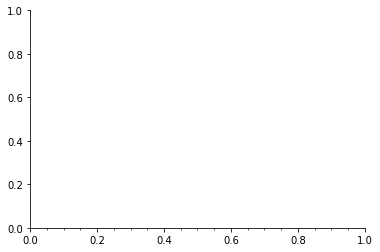

In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
fig, ax = plt.subplots()

# set the minor tick location to auto
ax.xaxis.set_minor_locator(AutoMinorLocator())

# turn off top and right splines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)